In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from read_file import *
from indicators import *

In [14]:
def PLS(m, params, NBMAX= 20, verbose=False):
	population = init(m,params)
	Xe = NDTree(NBMAX=NBMAX)
	for e in population: Xe.update(e)
	Pa = NDTree(NBMAX=NBMAX)

	iteration = 1
	while population:
		if verbose: print(f'{iteration = } | population size: {len(population)}')
		for p in population:
			for candidat in voisinage(p, params):
				if np.all(p[1] >= candidat[1]): continue
				if Xe.update(candidat): Pa.update(candidat)
		population = Pa.getPoints()
		Pa.reset()
		YND = Xe.getPoints()
		YND = np.array([p[1] for p in YND])
		plt.scatter(*YND.T)
		plt.xlim(xmin = 7e4, xmax=9e4)
		plt.ylim(ymin = 6e4, ymax=8e4)
		plt.show()
		iteration += 1
	return Xe.getPoints()

## Procedure I

(200, 2)
iteration = 1 | population size: 1


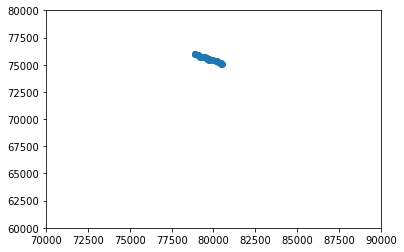

iteration = 2 | population size: 20


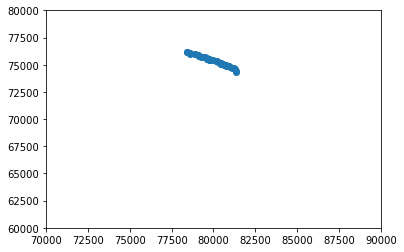

iteration = 3 | population size: 28


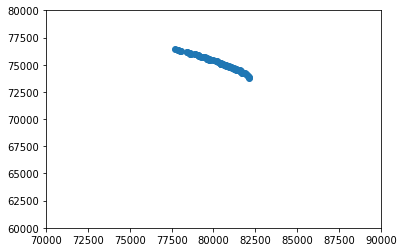

iteration = 4 | population size: 31


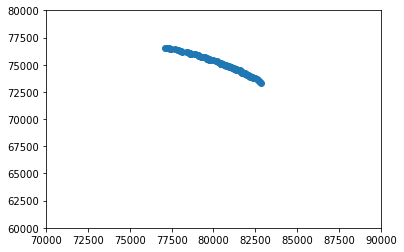

iteration = 5 | population size: 34


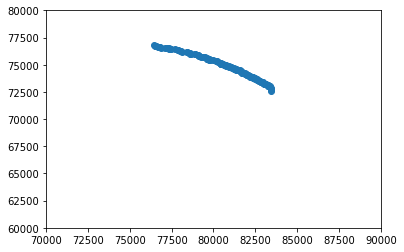

iteration = 6 | population size: 35


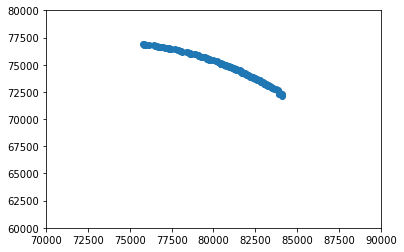

iteration = 7 | population size: 33


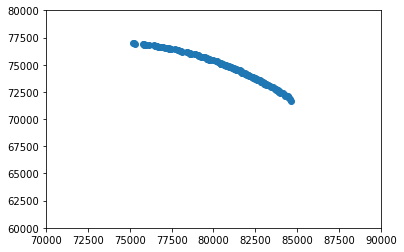

iteration = 8 | population size: 29


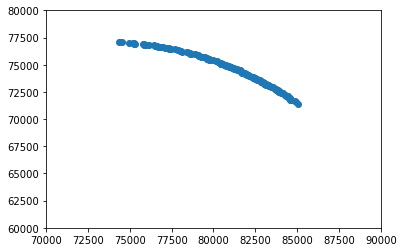

iteration = 9 | population size: 33


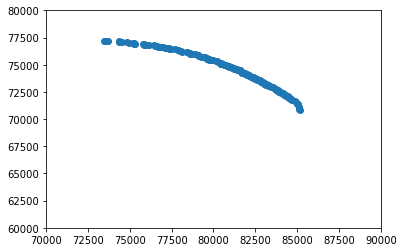

iteration = 10 | population size: 29


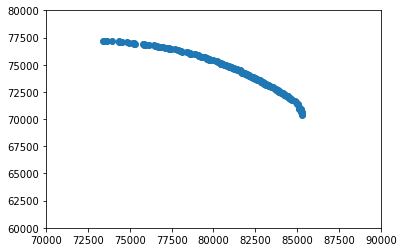

iteration = 11 | population size: 17


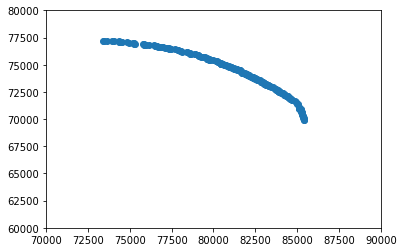

iteration = 12 | population size: 7


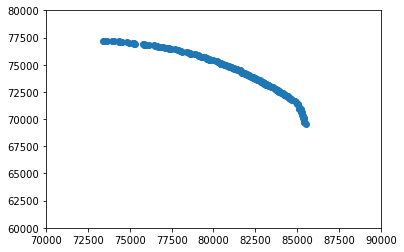

iteration = 13 | population size: 7


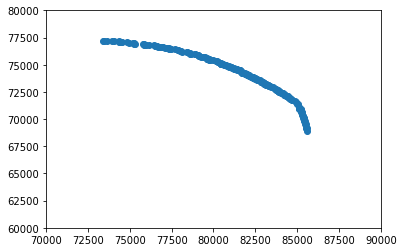

iteration = 14 | population size: 7


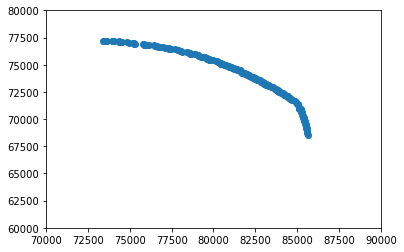

iteration = 15 | population size: 3


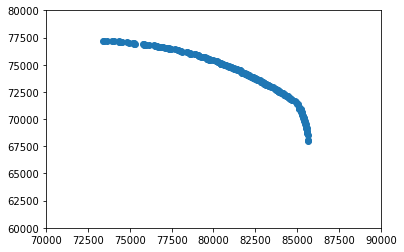

iteration = 16 | population size: 3


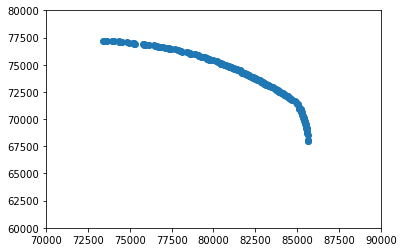

iteration = 17 | population size: 1


AttributeError: 'NoneType' object has no attribute 'isLeaf'

In [15]:
## Phase 1
numInstance=1
n= 200
p = 2
w=np.zeros(n,dtype=int) # poids des objets
v=np.zeros((n,p),dtype=int) # utilités des objets
filename = f"./data/2KP{n}-TA-{numInstance}.dat"

print(v.shape)

# W: budget
W=readFile(filename,w,v)

params = (n,p,v,w,W)
m = 1
verbose = True
NBMAX = 20

PLS(
    m,
    params,
    NBMAX,
    verbose= True
)

## Procedure II